In [1]:
import torch
from torch.autograd import Variable

import pyro
import pyro.distributions as dist

%matplotlib inline
# import some dependencies
import numpy as np
import matplotlib.pyplot as plt

In [10]:
###try the categorical distribution

#hogg 1.1-10 - chips marked 1,2,3 in a bowl
probs = Variable(torch.Tensor([3/6, 2/6, 1/6]))
pyro.sample('marked_num', dist.categorical, probs)

Variable containing:
 0
[torch.LongTensor of size 1]

In [22]:
pyro.sample('marked_num2', dist.categorical, probs).data[0]

0

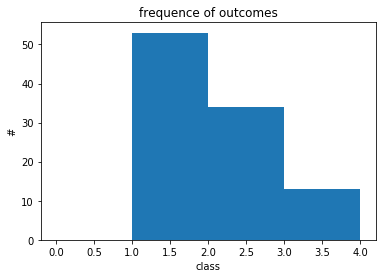

In [26]:


plt.hist([ pyro.sample('marked_num2', dist.categorical, probs).data[0]+1 for _ in range(100) ], range(0,5))
plt.title("frequence of outcomes")
plt.xlabel("class")
plt.ylabel("#")

In [125]:
#hogg example 1.3-11 
#can you find the prob of drawing 5 spades in one hand via simulation?

# spade vs not a spade
is_spade = Variable(torch.Tensor([0.75, 0.25]))

def draw_five_cards_with_replacement():
    
    all_spades = True
    for _ in range(5):
        sp = pyro.sample('spade', dist.categorical, is_spade).data[0]
        if sp is 0.0:
            all_spades = False
            break
    return all_spades

def prob_of_spade(cardNums):
    tot = cardNums['spade'] + cardNums['other']
    prob= cardNums['spade'] / tot
    #print(prob)
    return prob
    
def draw_five_cards_no_replacement():
    '''write me. change the probability as you select more spades.'''
    
    cardNums = dict(spade=13, other=49)

    all_spades = True
    for i in range(5):

        p  = prob_of_spade(cardNums)

        
        if (i > 3):
            print(i, p)
        
        is_spade = Variable(torch.Tensor([1-p, p]))
        sp = pyro.sample('spade', dist.categorical, is_spade).data[0]
        #print(sp)
        if sp is 0:
            all_spades = False
            break
        else:
            cardNums['spade']-=1
        
    return 1 if all_spades else 0   
    

    

        
        
        

In [127]:
np.sum([ draw_five_cards_no_replacement() for _ in range(1000)  ])

4 0.15517241379310345


0

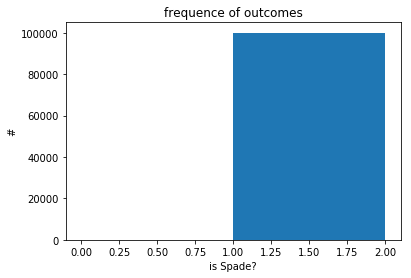

In [116]:
plt.hist([ draw_five_cards_no_replacement() for _ in range(100000)  ], range(0,3))
plt.title("frequence of outcomes")
plt.xlabel("is Spade?")
plt.ylabel("#")

In [106]:
#hogg 1.6-3 p55.
#frac, lire, hkdollar
counts_purse1 = [6,6,6]
counts_purse2 = [9,6,3]

probs1 = [1/3, 1/3, 1/3]
probs2 = [1/2, 1/3, 1/6]

#roll a four sided die.
roll = pyro.sample("roll", dist.categorical, Variable(torch.Tensor([.25, .25, .25, .25])))

def counts_to_logits(a):
    from scipy.special import logit
    tot = np.sum(a)
    probs = a / tot
    odds = probs / (1-probs)
    #print(odds)
    nplogit = np.log(odds)
    lgit = logit(odds)
    #print(nplogit, lgit)
    return nplogit
    
counts_to_logits(counts_purse2)
#if roll is 0 pick from p1
#if roll is 1,2,3 pick from p2

#can you work with logits here just to make sure you understand what a logit is?
#logits are log of the odds x/(1-x)
#log in math has a base of e.

#find the prob of selecting a franc. p(frac)
#find p(C1|franc)


#p(franc) = probability of the data p(D)
#p(franc) = p(franc, C1) + p(franc, C2) = p(franc|C1)p(C1) + p(franc|C2)p(C2)
# = .25*.333 + .75*(.5)  #this is correct.

#p(hkd) = .25*.33+.75*3/21

#p(franc) by simulation
def draw_coin():
    roll = pyro.sample("roll", dist.categorical, Variable(torch.Tensor([.25, .25, .25, .25])))
    if roll.data[0] is 0:
        counts = counts_purse1
        probs = probs1
    else:
        counts = counts_purse2
        probs = probs2
    
    #print(counts_to_logits(counts))
    #coin = dist.categorical(logits=Variable(torch.Tensor(counts_to_logits(counts))))
    coin = dist.categorical(Variable(torch.Tensor(probs)))
    
    #coin = pyro.sample("coin_chosen", dist.categorical, logits=Variable(torch.Tensor(counts_to_logits(counts)))
    return coin
            
        

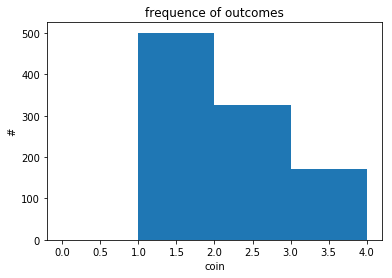

In [107]:

plt.hist([ draw_coin().data[0]+1 for _ in range(1000)  ], range(0,5))
plt.title("frequence of outcomes")
plt.xlabel("coin")
plt.ylabel("#")


# don't seem to get the right answer when I use logits.  I must have my logit calculation wrong. 
# tried a couple of different logit calcs.  Weird. 

